In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [2]:
# Load dataset
dataset1 = pd.read_csv("DS_jOBs.csv", index_col=None)

# Create copy of dataset
df2 = dataset1.copy()

# One-hot encode categorical variables
df2 = pd.get_dummies(df2, drop_first=True)

# Split data into independent (X) and dependent (Y) variables
indep_X = df2.drop(columns=['salary'])
dep_Y = df2['salary']


In [3]:
indep_X.head()

,work_year,salary_in_usd,job_title_Data Analyst (Remote),job_title_Data Analyst in office,job_title_Data Engineer,job_title_Data Engineer (Remote),job_title_Data Engineer in office,job_title_Data Scientist,job_title_Data Scientist (Remote),job_title_Data Scientist in office,...,work_setting_In-person,work_setting_Remote,company_location_DE,company_location_IN,company_location_JP,company_location_MX,company_location_UK,company_location_US,company_size_M,company_size_S
0,2022.0,136086.0,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,2020.0,67982.0,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
2,2022.0,153309.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2022.0,135242.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2020.0,35156.0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [4]:
dep_Y

0       186597.0
1       110630.0
2        61280.0
3       154130.0
4       172312.0
          ...   
4995    179769.0
4996    184642.0
4997    135319.0
4998     58037.0
4999    143565.0
Name: salary, Length: 5000, dtype: float64

In [5]:
df2

,work_year,salary,salary_in_usd,job_title_Data Analyst (Remote),job_title_Data Analyst in office,job_title_Data Engineer,job_title_Data Engineer (Remote),job_title_Data Engineer in office,job_title_Data Scientist,job_title_Data Scientist (Remote),...,work_setting_In-person,work_setting_Remote,company_location_DE,company_location_IN,company_location_JP,company_location_MX,company_location_UK,company_location_US,company_size_M,company_size_S
0,2022.0,186597.0,136086.0,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,2020.0,110630.0,67982.0,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,False
2,2022.0,61280.0,153309.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2022.0,154130.0,135242.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2020.0,172312.0,35156.0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020.0,179769.0,179111.0,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
4996,2021.0,184642.0,196373.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
4997,2022.0,135319.0,51366.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4998,2021.0,58037.0,181817.0,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True


In [6]:
# Step 1: Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.3, random_state=42)


In [7]:
# Step 2: Training a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Step 3: Predicting on the test set
y_pred = model.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred)
print(f"Model accuracy before permutation: {accuracy_before:.4f}")

Model accuracy before permutation: 0.0000


In [9]:
# Step 4: Applying Permutation Importance
# This will shuffle the values of each feature and evaluate how it impacts the accuracy
perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)

In [10]:
# Step 5: Displaying the feature importance results
feature_importance_df = pd.DataFrame({
    'Feature': indep_X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std})

In [11]:
# Sorting features by their importance
feature_importance_df = feature_importance_df.sort_values(by='Importance Mean', ascending=False)
print("\nFeature Importance:\n", feature_importance_df)


Feature Importance:
                                            Feature  Importance Mean  \
0                                        work_year              0.0   
23                           employee_residence_DE              0.0   
25                           employee_residence_JP              0.0   
26                           employee_residence_MX              0.0   
27                           employee_residence_UK              0.0   
28                           employee_residence_US              0.0   
29                             experience_level_EX              0.0   
30                             experience_level_MI              0.0   
31                             experience_level_SE              0.0   
32                              employment_type_FL              0.0   
33                              employment_type_FT              0.0   
34                              employment_type_PT              0.0   
35                          work_setting_In-person     

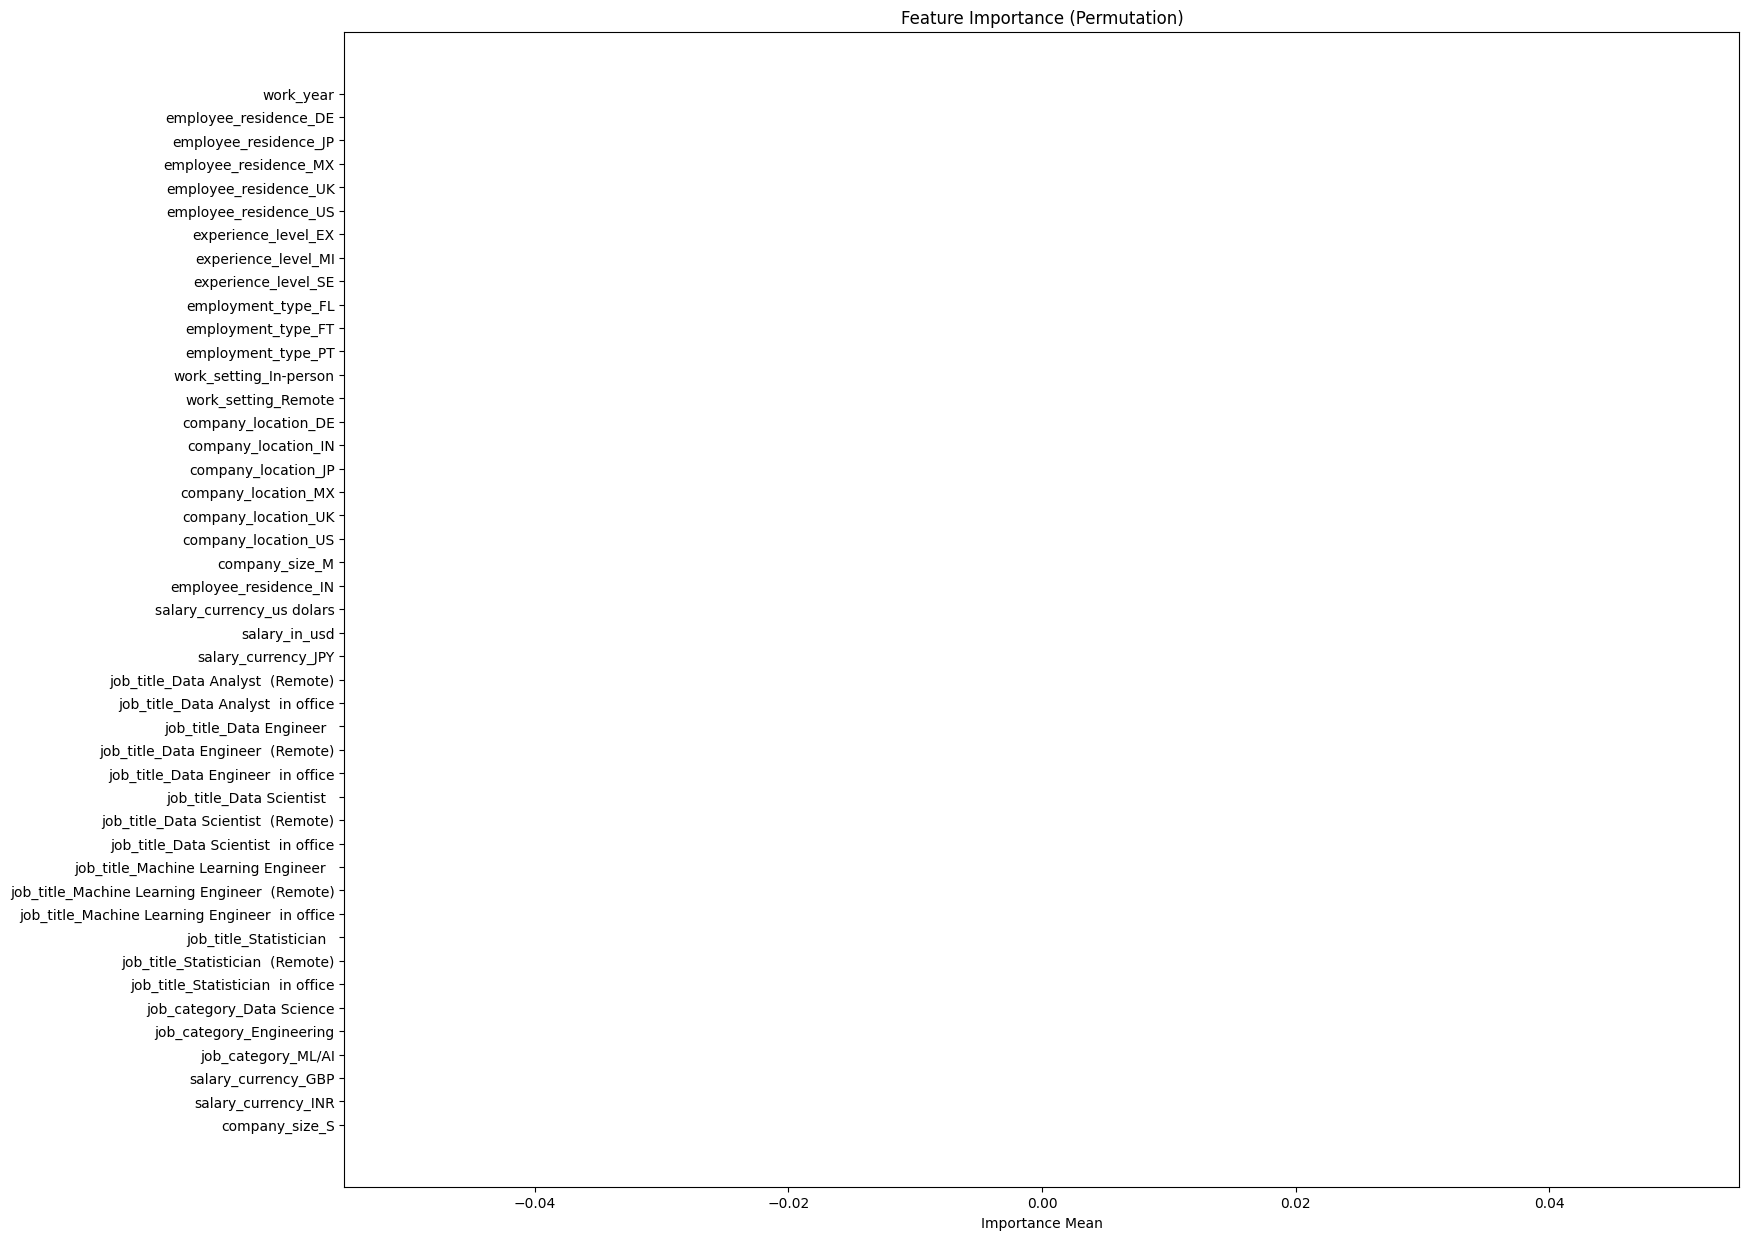

In [12]:
# Step 6: Visualizing Feature Importance (Optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 15))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance Mean'])
plt.xlabel('Importance Mean')
plt.title('Feature Importance (Permutation)')
plt.gca().invert_yaxis()
plt.show()
